In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
amp=10
tau=500
x=np.arange(-3500,3500,1)

In [3]:
def expo(amp, x, tau):
    y=[0]*len(x)
    for i in range (1, len(x)): 
        if (x[i] > 0):
            y[i] = amp * np.exp(-x[i]/tau)
        else:
            y[i] = 0
    return y

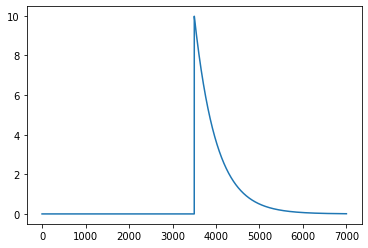

In [4]:
A = expo(amp, x, tau)
plt.plot(A)

In [5]:
#def trapFilter_new(input1, rise_time, flat_top, length, tau):
length=7000
rise_time=100
flat_top=200
input1=A

#initialize the arrays
trap = [0] *length

#make a loop to obtain filtered signal
for i in range(0, length):
        #single trapezoidal filetr for exponential decay
        if i>=(2*rise_time +flat_top):
            trap[i] = trap[i-1] + input1[i]-input1[i-rise_time]*np.exp(-rise_time/tau)-input1[i-rise_time-flat_top] + input1[i-2*rise_time-flat_top]*np.exp(-rise_time/tau)
#now scale the output
for i in range(0, length):
    trap[i] = trap[i]/rise_time

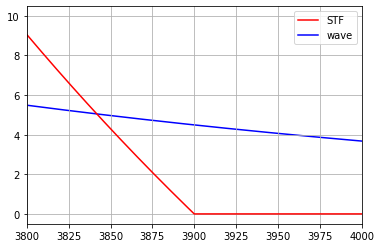

In [7]:
plt.plot(trap, color='r', label='STF', zorder=2)
plt.plot(A, color='b', label='wave', zorder=0)
plt.legend()
plt.xlim(3800,4000)
plt.grid()
plt.show()
